In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import time
from IPython.display import Image, display
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


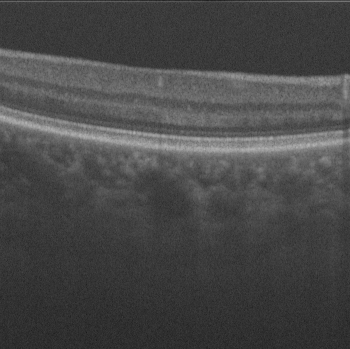

In [ ]:
def average_images(image_paths):
    # Read the images
    images = [cv2.imread(path) for path in image_paths]

    # Average calculation
    average_image = np.zeros_like(images[0], dtype=np.float64)
    for img in images:
        average_image += img / len(images)

    # Round values in array and cast as 8-bit integer
    average_image = np.round(average_image).astype(np.uint8)

    return average_image

# Path to the directory containing images
directory = '/content/gdrive/My Drive/ISD/non-aug/test/Ave350-360'

# Get list of image paths
image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.bmp')]

# Calculate the average image
averaged_img = average_images(image_paths)

# Display the averaged image
cv2_imshow(averaged_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


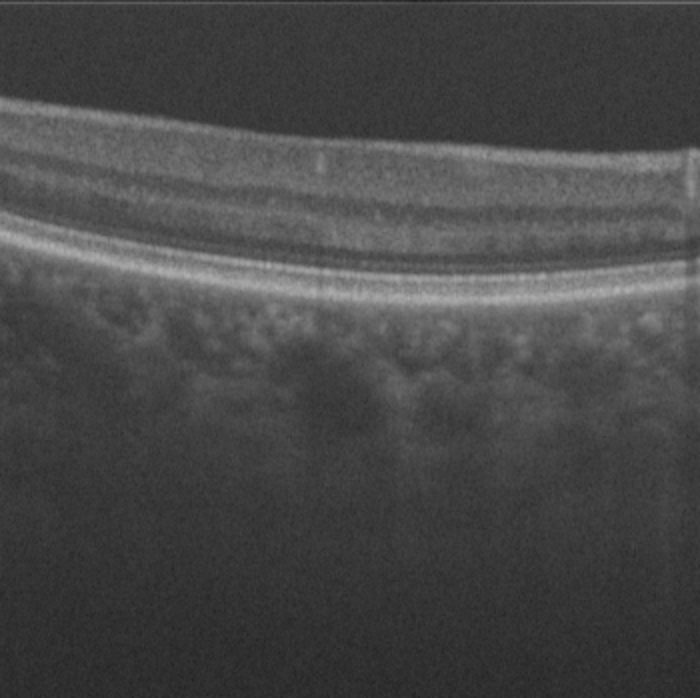

In [ ]:
#Resize image
scaling_factor = 2
resized_img = cv2.resize(averaged_img,None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_img)

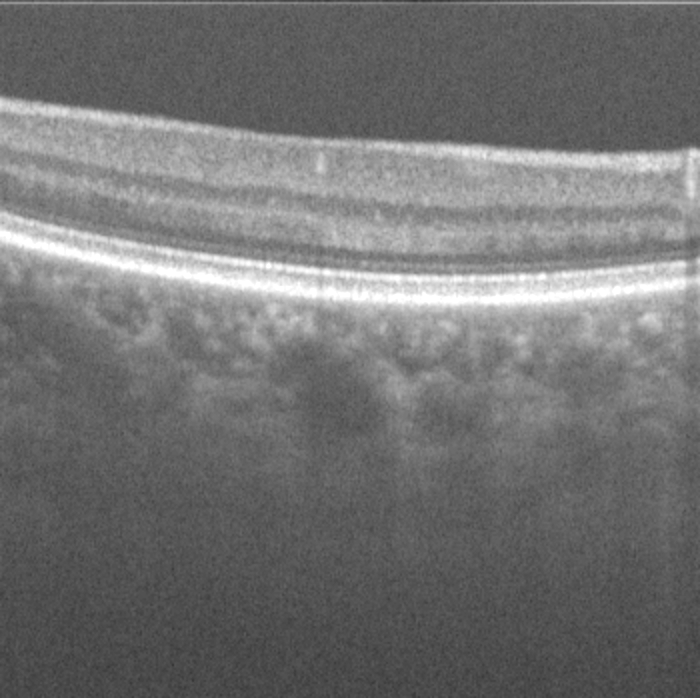

In [ ]:
def darken_image(image, factor=1.6):
    # Convert image to grayscale if not already
    if len(image.shape) == 3:
        gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    else:
        gray = np.copy(image)

    # Adjust pixel intensity levels to make the image darker
    darkened = np.clip(gray * factor, 0, 255).astype(np.uint8)

    return darkened

# Read the image
#image = cv2.imread('377.bmp')
image = resized_img

# Apply darkening to the grayscale image
darkened_image = darken_image(image)

# Display darkened image
cv2_imshow(darkened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


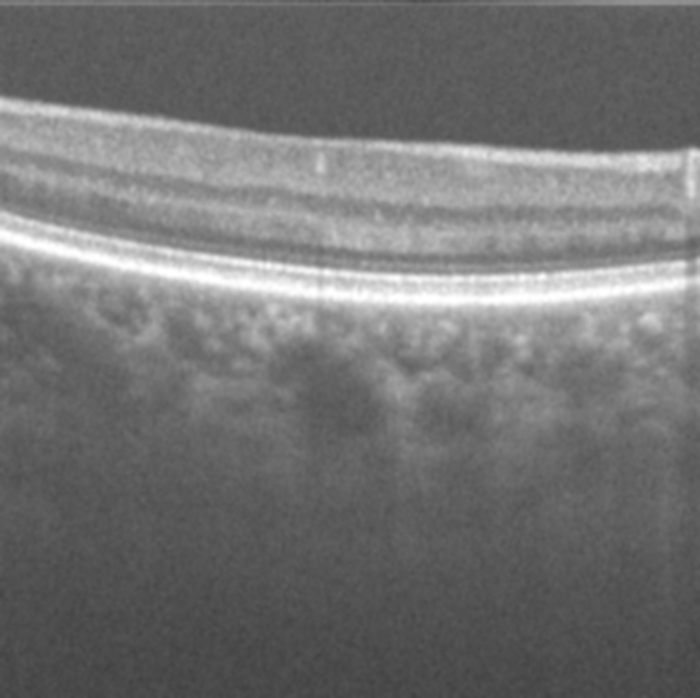

In [ ]:
#Blurring image to reduce noise
img_blur = cv2.GaussianBlur(darkened_image, (5,5), 3)
cv2_imshow(img_blur)

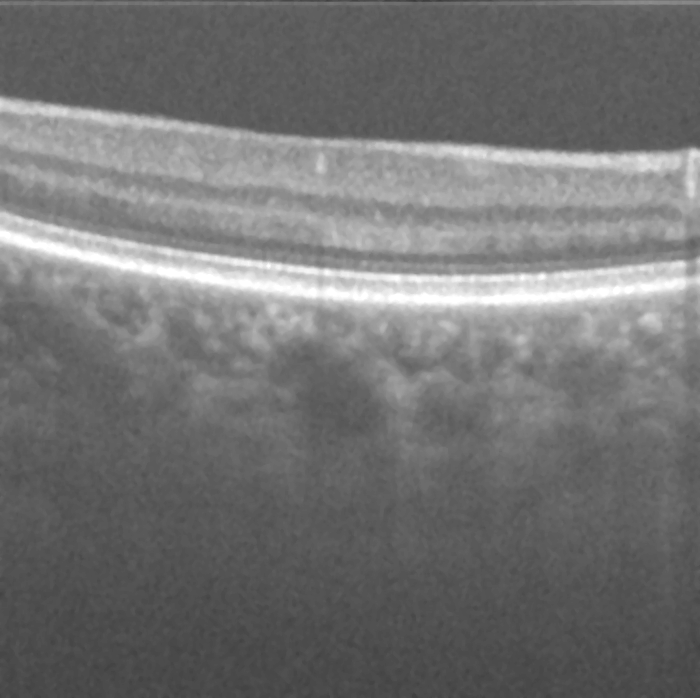

In [ ]:
img_blur = cv2.medianBlur(darkened_image, 5)
cv2_imshow(img_blur)

<Figure size 640x480 with 0 Axes>

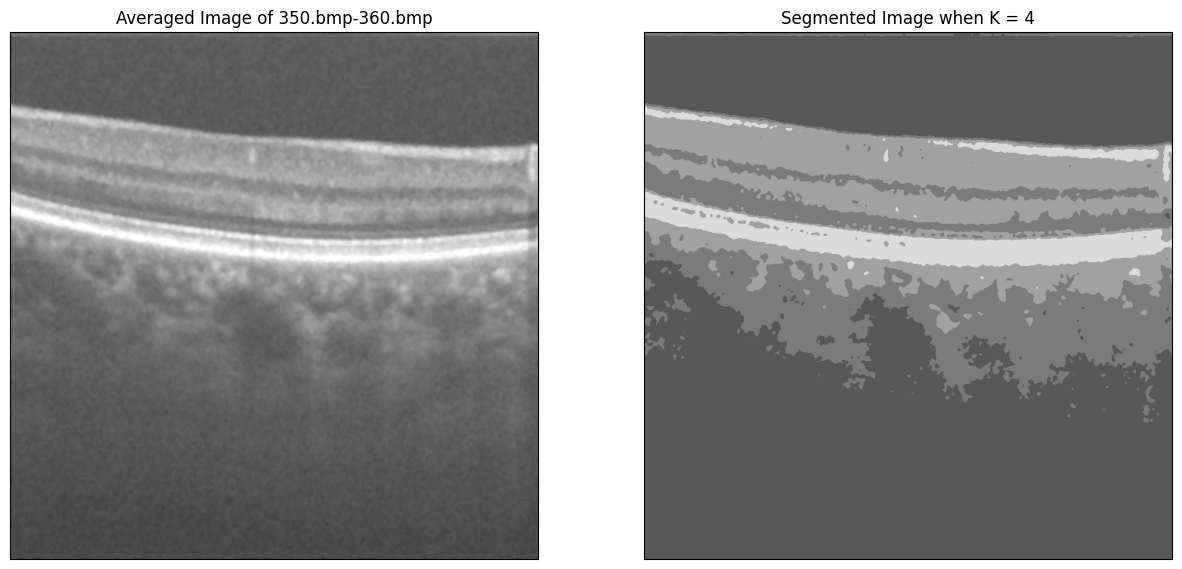

In [ ]:
img = cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts=15
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img, cmap='gray')
plt.title('Averaged Image of 350.bmp-360.bmp'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image, cmap='gray')
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

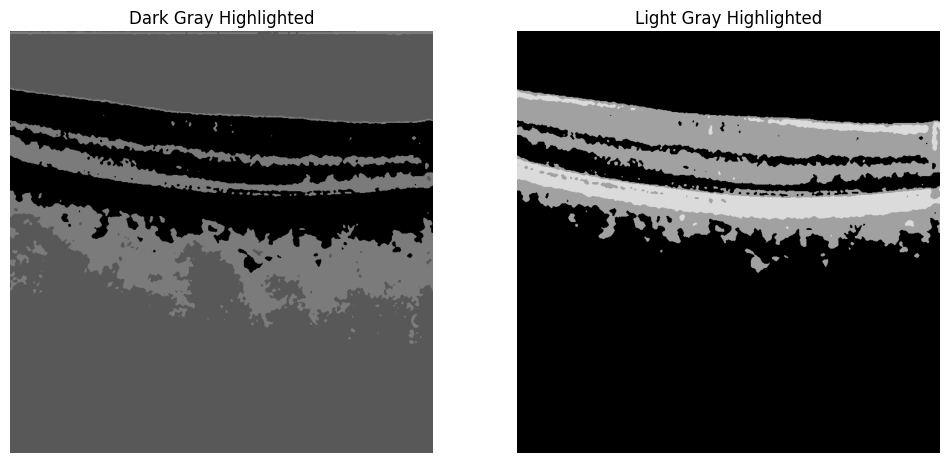

In [ ]:
# Convert the segmented image to HSV color space
segmented_hsv = cv2.cvtColor(result_image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for dark gray and light gray
dark_gray_lower = np.array([0, 0, 50])     # Lower bound for dark gray in HSV
dark_gray_upper = np.array([179, 50, 150]) # Upper bound for dark gray in HSV
light_gray_lower = np.array([0, 0, 150])    # Lower bound for light gray in HSV
light_gray_upper = np.array([179, 50, 220]) # Upper bound for light gray in HSV

# Create masks for dark gray and light gray
dark_gray_mask = cv2.inRange(segmented_hsv, dark_gray_lower, dark_gray_upper)
light_gray_mask = cv2.inRange(segmented_hsv, light_gray_lower, light_gray_upper)

# Apply the masks to the segmented image
dark_gray_highlighted = cv2.bitwise_and(result_image, result_image, mask=dark_gray_mask)
light_gray_highlighted = cv2.bitwise_and(result_image, result_image, mask=light_gray_mask)

# Display the original segmented image with the dark gray and light gray regions highlighted
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(dark_gray_highlighted, cv2.COLOR_BGR2RGB))
axes[0].set_title('Dark Gray Highlighted')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(light_gray_highlighted, cv2.COLOR_BGR2RGB))
axes[1].set_title('Light Gray Highlighted')
axes[1].axis('off')

plt.show()


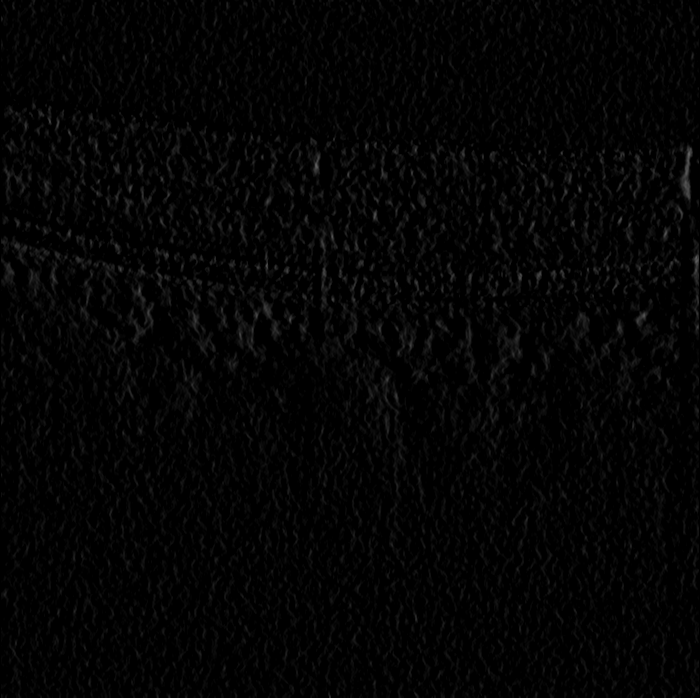

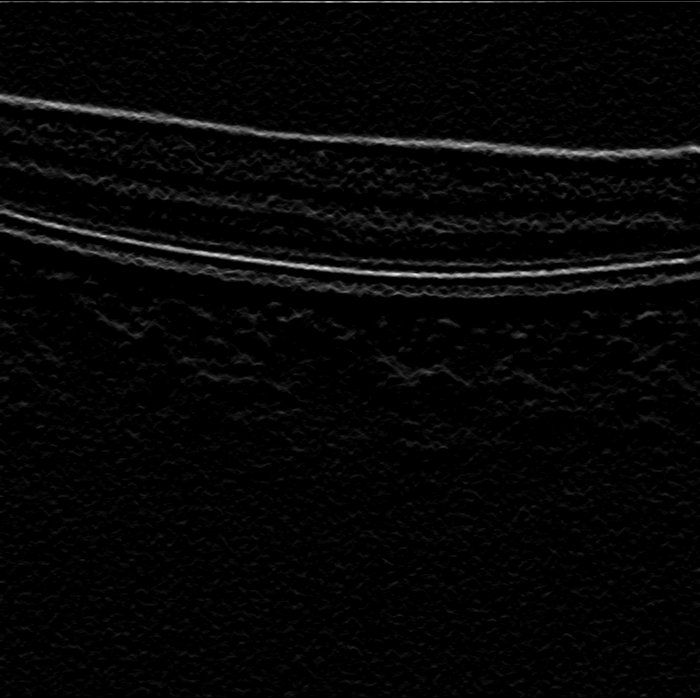

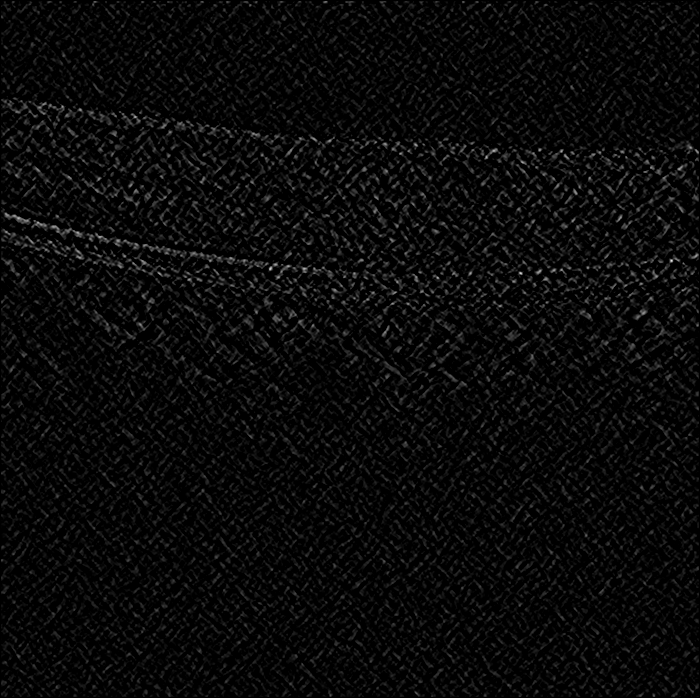

Runtime of Sobel edge detection: 0.07652616500854492 seconds


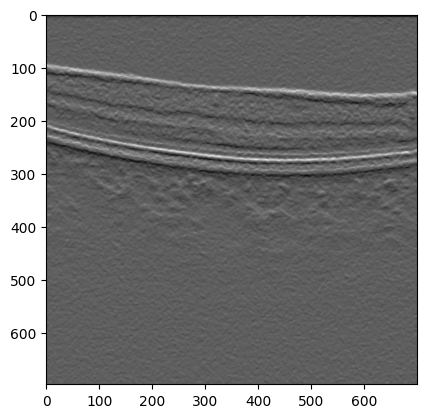

In [ ]:
# Sobel Edge Detection
Sobel_X = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
Sobel_Y = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
Sobel_XY = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Displaying Sobel Edge Detection Images
cv2_imshow(Sobel_X)
cv2.waitKey(0)
cv2_imshow(Sobel_Y)
cv2.waitKey(0)
plt.imshow(Sobel_Y, cmap='gray')
cv2.waitKey(0)
cv2_imshow(Sobel_XY)
cv2.waitKey(0)

# Start time
start_time = time.time()

for i in range(1000000):
    pass

# End time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

print("Runtime of Sobel edge detection:", runtime, "seconds")


In [ ]:
def calculate_snr(image, image_name):
    # Calculate signal power
    signal_power = np.mean(image)

    # Calculate noise power
    noise = image - signal_power
    noise_power = np.mean(np.square(noise))

   # If noise_power is zero, set SNR to a default value or handle as needed
    if noise_power == 0:
        print("Signal-to-Noise Ratio (SNR): undefined (noise power is zero)")
        return float('-inf')  # Return negative infinity or any default value

    # If signal_power is negative, add a negative sign to the calculation
    if signal_power < 0:
        signal_power = -signal_power
        print("A negative sign is added to the signal power for {} SNR calculation due to log10 function.\n".format(image_name))

    # Calculate SNR in dB
    snr_db = 10 * np.log10(signal_power / noise_power)

    return snr_db

def main():
    # Read image
    image1 = Sobel_X
    image2 = Sobel_Y
    image3 = Sobel_XY

    # Calculate SNR for each image
    snr1 = calculate_snr(image1, "Sobel_X")
    snr2 = calculate_snr(image2, "Sobel_Y")
    snr3 = calculate_snr(image3, "Sobel_XY")

    # Display SNR
    print("Signal-to-Noise Ratio (SNR) of Sobel X-axis : {:.2f} dB".format(snr1))
    print("Signal-to-Noise Ratio (SNR) of Sobel Y-axis : {:.2f} dB".format(snr2))
    print("Signal-to-Noise Ratio (SNR) of Sobel XY-axis : {:.2f} dB\n".format(snr3))

if __name__ == "__main__":
    main()

def calculate_noise(image):

    # Calculate standard deviation of pixel intensities
    noise = np.std(image)

    return noise

def main():
    # Read image
    image1 = Sobel_X
    image2 = Sobel_Y
    image3 = Sobel_XY

    # Calculate noise
    noise1 = calculate_noise(image1)
    print("Noise in Sobel_X:", noise1)
    noise2 = calculate_noise(image2)
    print("Noise in Sobel_Y:", noise2)
    noise3 = calculate_noise(image3)
    print("Noise in Sobel_XY:", noise3)

if __name__ == "__main__":
    main()

A negative sign is added to the signal power for Sobel_Y SNR calculation due to log10 function.

A negative sign is added to the signal power for Sobel_XY SNR calculation due to log10 function.

Signal-to-Noise Ratio (SNR) of Sobel X-axis : -38.67 dB
Signal-to-Noise Ratio (SNR) of Sobel Y-axis : -33.15 dB
Signal-to-Noise Ratio (SNR) of Sobel XY-axis : -53.85 dB

Noise in Sobel_X: 11.685248799173536
Noise in Sobel_Y: 23.4787925116694
Noise in Sobel_XY: 26.355791791362208


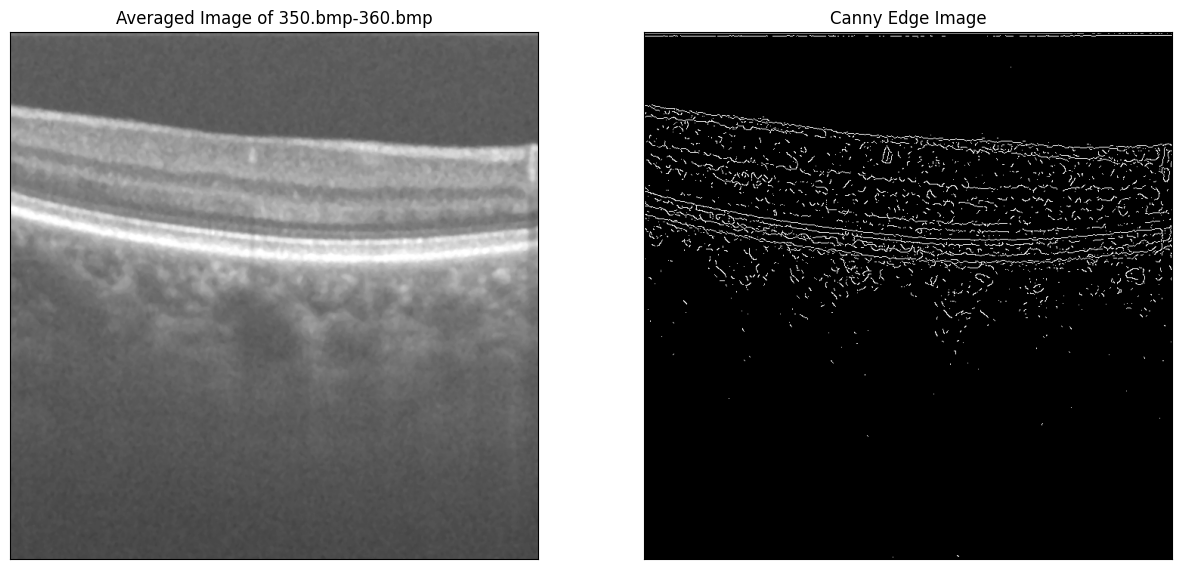

Runtime of Canny edge detection: 0.12122559547424316 seconds


In [ ]:
edges = cv2.Canny(img_blur,55,55)


figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img, cmap='gray')
plt.title('Averaged Image of 350.bmp-360.bmp'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Start time
start_time = time.time()

for i in range(1000000):
    pass

# End time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

print("Runtime of Canny edge detection:", runtime, "seconds")

In [ ]:
def calculate_snr(image):
    # Calculate signal power
    signal_power = np.mean(image)

    # Calculate noise power
    noise = image - signal_power
    noise_power = np.mean(np.square(noise))

    # Calculate SNR in dB
    snr_db = 10 * np.log10(signal_power / noise_power)

    return snr_db

def main():
    # Read image
    image = edges

    # Calculate SNR for each image
    snr1 = calculate_snr(image)

    # Display SNR
    print("Signal-to-Noise Ratio (SNR) of Canny edge detector : {:.2f} dB\n".format(snr1))

if __name__ == "__main__":
    main()

def calculate_noise(image):

    # Calculate standard deviation of pixel intensities
    noise = np.std(image)

    return noise

def main():
    # Read image
    image = edges

    # Calculate noise
    noise = calculate_noise(image)
    print("Noise in the image of Canny edge detector:", noise)

if __name__ == "__main__":
    main()

Signal-to-Noise Ratio (SNR) of Canny edge detector : -23.94 dB

Noise in the image of Canny edge detector: 42.081779758826414


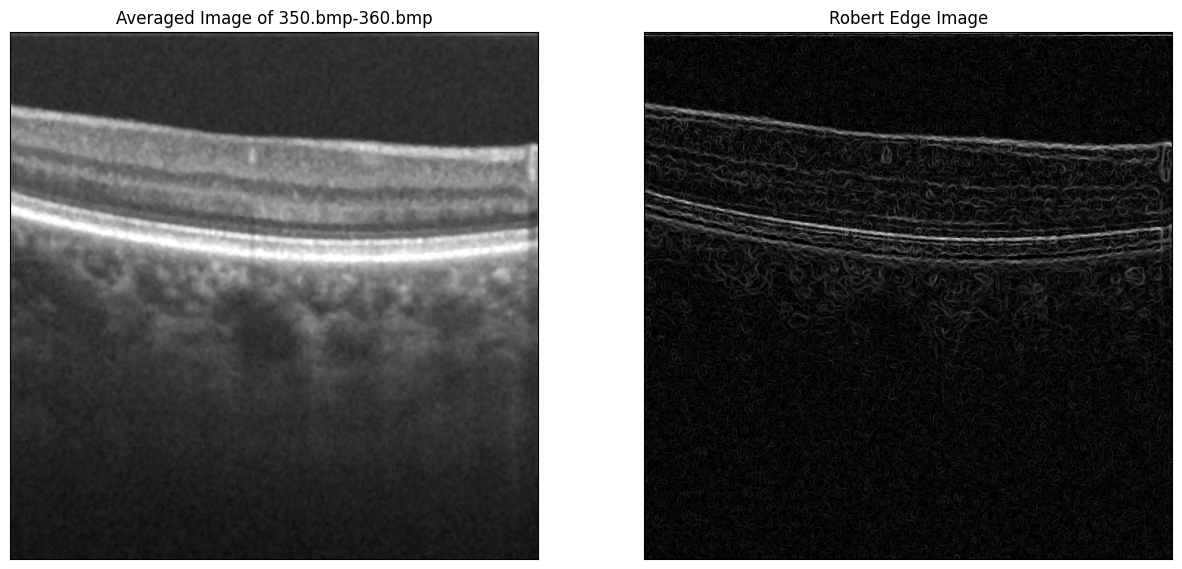

Runtime of Robert edge detection: 0.0764765739440918 seconds


In [ ]:
#Robert Edge detection
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

#img = img_blur.astype('float64') #cv2.imread('377.bmp',0)
img=  img_blur.astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_img*=255

# Display Robert Edge Detection Image
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Averaged Image of 350.bmp-360.bmp'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edged_img,cmap = 'gray')
plt.title('Robert Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Start time
start_time = time.time()

for i in range(1000000):
    pass

# End time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

print("Runtime of Robert edge detection:", runtime, "seconds")

In [ ]:
def calculate_snr(image):
    # Calculate signal power
    signal_power = np.mean(image)

    # Calculate noise power
    noise = image - signal_power
    noise_power = np.mean(np.square(noise))

    # Calculate SNR in dB
    snr_db = 10 * np.log10(signal_power / noise_power)

    return snr_db

def main():
    # Read image
    image = edged_img

    # Calculate SNR for each image
    snr1 = calculate_snr(image)

    # Display SNR
    print("Signal-to-Noise Ratio (SNR) of Robert edge detector : {:.2f} dB\n".format(snr1))

if __name__ == "__main__":
    main()

def calculate_noise(image):

    # Calculate standard deviation of pixel intensities
    noise = np.std(image)

    return noise

def main():
    # Read image
    image = edged_img

    # Calculate noise
    noise = calculate_noise(image)
    print("Noise in the image of Robert edge detector:", noise)

if __name__ == "__main__":
    main()

Signal-to-Noise Ratio (SNR) of Robert edge detector : -6.99 dB

Noise in the image of Robert edge detector: 3.9611696518167183


END OF PROJECT
below is trial and error


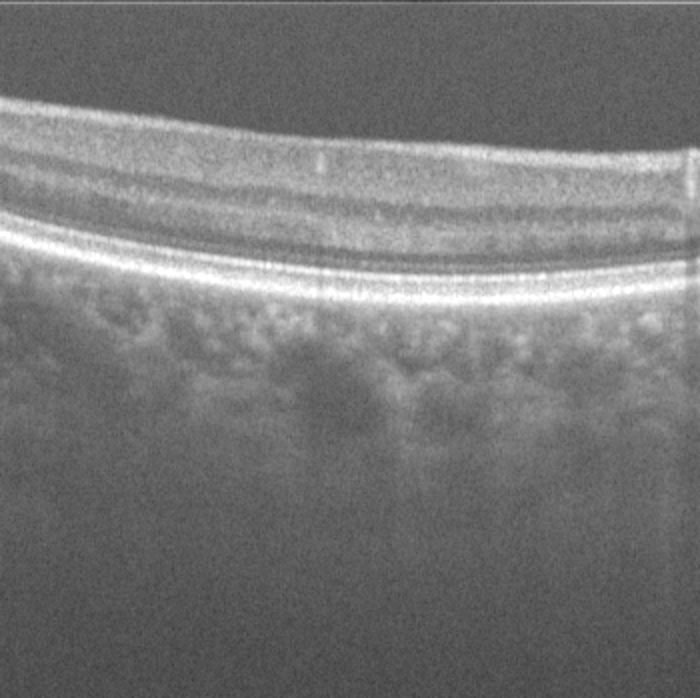

In [ ]:
# define the alpha and beta
alpha = 1.5 # Contrast control
beta = 10 # Brightness control

# call convertScaleAbs function
adjusted = cv2.convertScaleAbs(resized_img, alpha=alpha, beta=beta)

# display the output image
cv2_imshow(adjusted)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
print('Hello World')

Hello World
